# Sales Analysis

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load sales data (csv)

In [2]:
path_data = 'Sales_Data/'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df = pd.DataFrame()

for month in months:
    current_month = pd.read_csv(path_data+f'Sales_{month}_2019.csv')
    df = pd.concat([df, current_month])
    
# Export to csv and read as df    
df.to_csv('data_all_months.csv', index=False)
df = pd.read_csv('data_all_months.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


## Data Wrangling

#### Check 0 values

In [3]:
df.isin([0]).any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

#### Delete Column Header inside the DataFrame

In [4]:
df.drop(df.loc[df['Quantity Ordered']=='Quantity Ordered'].index, inplace=True)

#### Check NaN Values

In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Drop NaN rows

In [6]:
df.dropna(inplace=True)

#### Adjust data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##### Change data types
* #Order ID = int
* Quantity Ordered = int
* Price Each = float
* Order Date = date

In [8]:
# Change Order Date data types
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# Change Order id data types
#df['Order ID'] = df['Order ID'].astype('int64')

# Change Quantity Ordered data types
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

# Change Price Each data types
df['Price Each'] = df['Price Each'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


## Exploratory Data Analysis

### Question 1: What was the best month for sales? How much was earned that month?

In [9]:
# Make a Month column with format short name (Jan, Feb, etc)
df['Month'] = df['Order Date'].dt.strftime('%b')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan


Best month for sales is Dec with total earning of USD 4613443.34000153


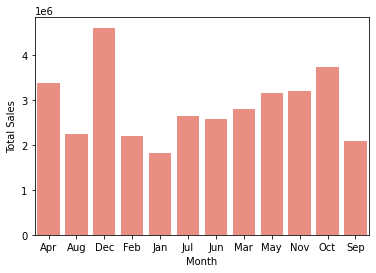

In [10]:
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
# display(df.groupby('Month').sum().sort_values(by='Total Sales', ascending=False))
print('Best month for sales is', df.groupby('Month').sum().sort_values(by='Total Sales', ascending=False).index[0],
     'with total earning of USD', df.groupby('Month').sum().sort_values(by='Total Sales', ascending=False)['Total Sales'][0],)

# Plot Total Sales to Month
sns.barplot(data=df, x=df.groupby('Month').sum().index,
            y=df.groupby('Month').sum()['Total Sales'], color='salmon')
plt.show()

### Question 2: What city sold the most product?

In [11]:
# Slice state from Purchase Address
state = df['Purchase Address'].str.slice(-8, -6)

# Slice city from Purchase Address
cities = pd.Series(df['Purchase Address'].str.split(pat=','))
city_arr = []
for i in cities:
    city = i[1].strip(' ') + ', ' # strip whitespace and add ', '
    city_arr.append(city)

# When I convert city_arr to Series than add it to df, why it produces NaN values???
df['City'] = city_arr
df['City'] = df['City'] + state
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,700.00,"Boston, MA"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,14.95,"Portland, OR"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,23.98,"San Francisco, CA"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,149.99,"Los Angeles, CA"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,11.99,"Austin, TX"
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",Dec,14.95,"San Francisco, CA"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Dec,7.68,"Los Angeles, CA"
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Dec,400.00,"Seattle, WA"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dec,11.99,"Dallas, TX"


City sold the most product is San Francisco, CA


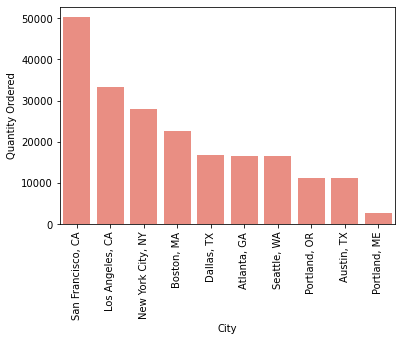

In [12]:
# Pivot table for City and Product Quantity Ordered
quantity_city = pd.pivot_table(df, values='Quantity Ordered', index='City', aggfunc=np.sum).sort_values(by='Quantity Ordered', ascending=False)
# display(quantity_city)
print('City sold the most product is', quantity_city.index[0])

# Plot Quantity Ordered to Cities
sns.barplot(data=quantity_city, x=quantity_city.index, y=quantity_city['Quantity Ordered'], color='salmon')
plt.xticks(rotation=90)
plt.show()

City made most sales is San Francisco, CA


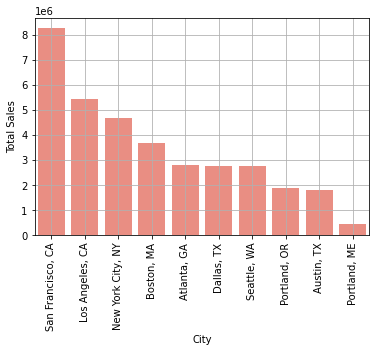

In [13]:
# Pivot table for City and Total Sales
sales_city = pd.pivot_table(df, values='Total Sales', index='City', aggfunc=np.sum).sort_values(by='Total Sales', ascending=False)
# display(sales_city)
print('City made most sales is', sales_city.index[0])

# Plot Quantity Ordered to Cities
ax = sns.barplot(data=sales_city, x=sales_city.index, y='Total Sales', color='salmon')
plt.xticks(rotation=90)
ax.grid(True)
plt.show()

### Question 2b: What state sold the most product?

In [14]:
# Slice State from Purchase Address
df['State'] = df['Purchase Address'].str.slice(-8, -6)

In [15]:
# Pivot table for State and Product
quantity_city = pd.pivot_table(df, values='Quantity Ordered', index='State', aggfunc=np.sum)
display(quantity_city.sort_values(by='Quantity Ordered', ascending=False))
print('State sold the most product is', quantity_city['Quantity Ordered'].sort_values(ascending=False).index[0])

,Quantity Ordered
State,
CA,83528
NY,27932
TX,27883
MA,22528
GA,16602
WA,16553
OR,11303
ME,2750


State sold the most product is CA


In [16]:
# Pivot table for State and Total Sales
sales_state = pd.pivot_table(df, values='Total Sales', index='State', aggfunc=np.sum)
display(sales_state.sort_values(by='Total Sales', ascending=False))
print('State made most sales is', sales_state['Total Sales'].sort_values(ascending=False).index[0])

,Total Sales
State,
CA,1.371477e+07
NY,4.664317e+06
TX,4.587557e+06
MA,3.661642e+06
GA,2.795499e+06
WA,2.747755e+06
OR,1.870732e+06
ME,4.497583e+05


State made most sales is CA


### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

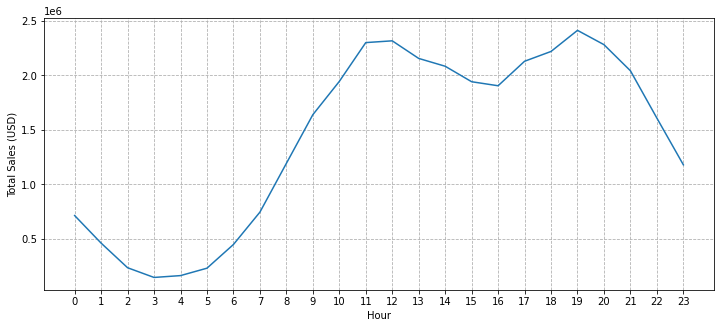

In [17]:
# Make an Order Time (in hour and minute) column

df['Order Time'] = df['Order Date'].dt.strftime('%H:%M')
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%H:%M')

# Pivot table of Order Time and Total Sales
time_sales = pd.pivot_table(df, values='Total Sales', index='Order Time', aggfunc=np.sum)
# Grouping Total Sales datas into hourly with sum values
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
time_sales = time_sales.resample('H').sum()
time_sales.set_index(np.arange(24), inplace=True)

# Lineplot of Total Sales and Order Time
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=time_sales.index, y='Total Sales', data=time_sales)
# Set labels
plt.ylabel('Total Sales (USD)')
plt.xlabel('Hour')
# Set xticks
plt.xticks(np.arange(24))
# Set grid
ax.grid(True, linestyle='--')
# Show the plot
plt.show()

Based on the plot, to maximize the likelihood of customer's buying the products, we should display ad for: <br>
* Slightly before 11 am or 7 pm. This assume that we haven't reached peak customer at those hours

### Question 4: What products are most often sold together?

In [18]:
# First we have to group product sold together by Order ID
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
order_id = df[df['Order ID'].duplicated(keep=False)]

# Then we pivot table Order ID and product
# https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
orderID_product = order_id.groupby('Order ID')['Product'].apply(', '.join).reset_index()

# Then we count products purchased together
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in orderID_product['Product']:
    product = sublist.split(', ')
    count.update(Counter(combinations(product, 2)))

    
"""
# 10 produt pairs most often sold together
print('10 produt pairs most often sold together:')
for i in range(10):
    max_key = max(count, key=count.get)
    print(max_key, 'sum:' ,count[max_key])
    count.pop(max_key)
"""

# convert dictionary 'count' to dataframe
count = pd.DataFrame(count, index=['Count']).T.sort_values(by='Count', ascending=False)
display(count.head(10))

,,Count
iPhone,Lightning Charging Cable,1005
Google Phone,USB-C Charging Cable,987
iPhone,Wired Headphones,447
Google Phone,Wired Headphones,414
Vareebadd Phone,USB-C Charging Cable,361
iPhone,Apple Airpods Headphones,360
Google Phone,Bose SoundSport Headphones,220
USB-C Charging Cable,Wired Headphones,160
Vareebadd Phone,Wired Headphones,143
Lightning Charging Cable,Wired Headphones,92


### Question 5: What product sold the most? Why do you think it sold the most?

,Price Each,Quantity Ordered
Product,,
AAA Batteries (4-pack),2.99,31017
AA Batteries (4-pack),3.84,27635
USB-C Charging Cable,11.95,23975
Lightning Charging Cable,14.95,23217
Wired Headphones,11.99,20557
Apple Airpods Headphones,150.00,15661
Bose SoundSport Headphones,99.99,13457
27in FHD Monitor,149.99,7550
iPhone,700.00,6849


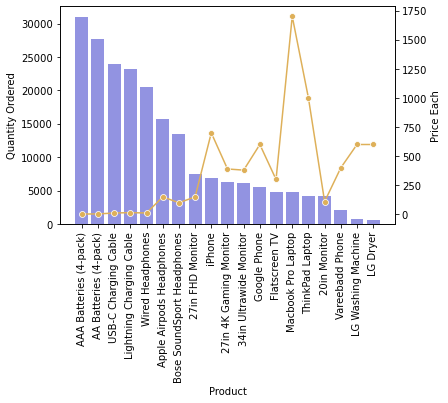

Product sold the most (by quantity) is  AAA Batteries (4-pack)


In [19]:
# Pivot table for Product and Quantity Ordered
product_quantity = pd.pivot_table(df, values=['Quantity Ordered', 'Price Each'], index='Product',
                                  aggfunc={'Quantity Ordered':np.sum, 'Price Each':np.mean}).sort_values(by='Quantity Ordered', ascending=False)
display(product_quantity)

# Barplot for Quantity Ordered
fig, ax1 = plt.subplots()
ax1 = sns.barplot(x=product_quantity.index, y='Quantity Ordered', data=product_quantity, 
            color='#0B10E0', alpha = 0.5)
# Rotate x-labels to horizontal
plt.xticks(rotation=90)

# Lineplot for Price Each
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=product_quantity.index, y='Price Each', data=product_quantity, 
                   marker='o', color='#DEB059')

# Show the plot
plt.show()

# Express the answer
print('Product sold the most (by quantity) is ', product_quantity.index[0])

Product sold the most (by quantity) is  AAA Batteries (4-pack). Probably because:<br>
* It is consumable
* Most electronics use AAA batteries as power source
* It's the cheapest so people won't be too reluctant to spent money on it